# CARDIOVASCULAR CATH DISEASE

## The Cardio Catch Diseases (CCD) Company
Cadio Catch Diseases is a company that specializes in detecting heart disease in the early stages. Its business model is Service type, that is, the company offers an early diagnosis of cardiovascular disease for a certain price.

Currently, the diagnosis of cardiovascular disease is made manually by a team of specialists. The current accuracy of the diagnosis varies between 55% and 65%, due to the complexity of the diagnosis and also the fatigue of the team who take turns to minimize the risks. The cost of each diagnosis, including the devices and the payroll of the analysts, is around R $ 1,000.00.

The price of the diagnosis, paid by the client, varies according to the precision achieved by the team of specialists, the client pays R $ 500.00 for every 5% accuracy above 50%. For example, for an accuracy of 55%, the diagnosis costs R $ 500.00 for the client, for an accuracy of 60%, the value is R $ 1000.00 and so on. If the diagnostic accuracy is 50%, the customer does not pay for it.

Note that the variation in precision given by the team of specialists, makes the company either have a profitable operation, revenue greater than the cost, or an operation at a loss, revenue less than the cost. This instability of the diagnosis makes the company to have an unpredictable Cashflow.

Your objective as the Data Scientist hired by Cardio Catch Diseases is to create a tool that increases the accuracy of the diagnosis and that this accuracy is stable for all diagnoses.

So your job as a Data Scientist is to create a patient classification tool, such as stable accuracy. Along with the tool, you need to send a report to the CEO of Cardio Catch Diseases, reporting the results and answering the following questions: (He will probably ask these questions on the day of your presentation.)

What is the Accuracy and Precision of the tool?
How much profit will Cardio Catch Diseases have with the new tool?
How Reliable is the result given by the new tool?
The Challenge Data
The data set that will be used to create the solution for Cardio Catch Diseases, is available on the Kaggle platform.

This is the link: Cardiovascular Disease dataset

This data set contains 70,000 patient diagnoses. You will use this data to create your solution.

# 0.0 IMPUTS

## 0.1 Imports

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot   as plt
import seaborn             as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings( 'ignore' )

## 0.2 Helpers Functions

## 0.3 Loading Data

In [2]:
df_cardio_raw = pd.read_csv('data/cardio_train.csv', low_memory= False, delimiter=';')

# 1.0 DATA DESCRIPTION

In [3]:
df1 = df_cardio_raw.copy()

In [4]:
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1.1 Features Description

There are 3 types of input features:

**Objective:** factual information;

**Examination:** results of medical examination;

**Subjective:** information given by the patient.


### Features:

**- Age** | Objective Feature | age | int (days)

**- Height** | Objective Feature | height | int (cm) |

**- Weight** | Objective Feature | weight | float (kg) |

**- Gender** | Objective Feature | gender | categorical code |

**- Systolic blood pressure** | Examination Feature | ap_hi | int |

**- Diastolic blood pressure** | Examination Feature | ap_lo | int |

**- Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

**- Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

**- Smoking** | Subjective Feature | smoke | binary |

**- Alcohol intake** | Subjective Feature | alco | binary |

**- Physical activity** | Subjective Feature | active | binary |

**- Presence or absence of cardiovascular disease** | Target Variable | cardio | binary |


All of the dataset values were collected at the moment of medical examination.

## 1.2 Rename Columns

In [5]:
new_columns = {"ap_hi": "high_blood_pressure", "ap_lo": "low_blood_pressure", "gluc": "glucose",
              "smoke": "smoking", "alco": "alcohol", "active": "physical_activity", "cardio": "cardio_disease"}

df1.rename(columns=new_columns, inplace=True)

df1.head()

,id,age,gender,height,weight,high_blood_pressure,low_blood_pressure,cholesterol,glucose,smoking,alcohol,physical_activity,cardio_disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1.3 Data Dimentions

In [6]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 70000
Number of cols: 13


## 1.4 Data Types

In [7]:
df1.dtypes

id                       int64
age                      int64
gender                   int64
height                   int64
weight                 float64
high_blood_pressure      int64
low_blood_pressure       int64
cholesterol              int64
glucose                  int64
smoking                  int64
alcohol                  int64
physical_activity        int64
cardio_disease           int64
dtype: object

## 1.5 Check NA

In [8]:
df1.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
high_blood_pressure    0
low_blood_pressure     0
cholesterol            0
glucose                0
smoking                0
alcohol                0
physical_activity      0
cardio_disease         0
dtype: int64

## 1.6 Change Types

We're going to convert the age units from days to years so it becomes easier to interpret and check if there is any outlier. However, for the future calculations, we're going to keep the days column, because there's a chance that we may lose information by rounding the data.

In [9]:
# converting days to years
df1['age_years'] = ((df1['age'])/365).round(2)
df1.head()

,id,age,gender,height,weight,high_blood_pressure,low_blood_pressure,cholesterol,glucose,smoking,alcohol,physical_activity,cardio_disease,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87


Gender can be estimated by height, as men are on average taller than women of the same age.

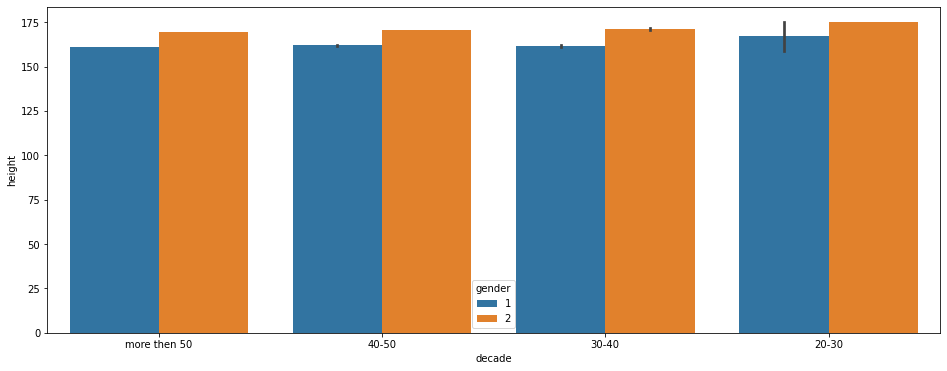

In [10]:
fig = plt.figure(figsize = (16,6))

aux1 = df1[['age_years','height', 'gender']]
aux1['decade'] = aux1['age_years'].apply( lambda x: '20-30' if x <= 30 else 
                                         ( 'less than 30' if 20<x<= 30 else 
                                          ( '30-40' if 30<x<= 40 else 
                                           ( '40-50' if 40<x<= 50 else 'more then 50'))))

sns.barplot( x = 'decade', y = 'height', data = aux1, hue = 'gender');

In [11]:
df1["gender"] = df1["gender"].map({1: "women", 2: "men"})

# changing the descriptions contained at Features Description for exploratory data analysis:
df1["cholesterol"] = df1["cholesterol"].map({1: "normal", 2: "above normal", 3: "well above normal"})
df1["glucose"] = df1["glucose"].map({1: "normal", 2: "above normal", 3: "well above normal"})

# transforming float in int number:
df1['weight'] = df1['weight'].astype(int)

In [12]:
df1.dtypes

id                       int64
age                      int64
gender                  object
height                   int64
weight                   int32
high_blood_pressure      int64
low_blood_pressure       int64
cholesterol             object
glucose                 object
smoking                  int64
alcohol                  int64
physical_activity        int64
cardio_disease           int64
age_years              float64
dtype: object

**Data types :** int64 (12), int32 (1), float64 (1).

## 1.7 Descriptive Statistical

In [18]:
num_attributes = df1.select_dtypes(include = ['int64', 'int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'int32', 'float64'])

### 1.7.1 Numerical Attributes

In [14]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - Std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.00,99999.00,99999.00,49972.419900,50001.50,28851.096242,-0.001278,-1.198374
1,age,10798.00,23713.00,12915.00,19468.865814,19703.00,2467.234044,-0.307055,-0.823447
2,height,55.00,250.00,195.00,164.359229,165.00,8.210068,-0.642187,7.943653
3,weight,10.00,200.00,190.00,74.204329,72.00,14.395850,1.012030,2.586746
4,high_blood_pressure,-150.00,16020.00,16170.00,128.817286,120.00,154.010319,85.296214,7580.074738
5,low_blood_pressure,-70.00,11000.00,11070.00,96.630414,80.00,188.471184,32.114083,1425.914585
6,smoking,0.00,1.00,1.00,0.088129,0.00,0.283482,2.905867,6.444250
7,alcohol,0.00,1.00,1.00,0.053771,0.00,0.225566,3.956607,13.655125
8,physical_activity,0.00,1.00,1.00,0.803729,1.00,0.397176,-1.529473,0.339296
9,cardio_disease,0.00,1.00,1.00,0.499700,0.00,0.500000,0.001200,-2.000056


In the data we can see possible outliers:


- Minimum **height** = 55.00, and minimum **weight** = 10.00, when **age_years** = 29.58;

- Maximum blood pressure **high_blood_pressure** = 16170.00 and **low_blood_pressure** = 11070.00. 

### 1.7.2 Categorical Attributes

In [19]:
cat_attributes.apply( lambda x: x.unique().shape[0])

gender         2
cholesterol    3
glucose        3
dtype: int64